In [ ]:
# %%

# Use Google Colab
use_google_colab = False
# Process the training dataset
training_data_processing = False
# Train the model
model_training = True
# Validation the model
model_validation = True
# Load the model from your Google Drive or local file system
model_loading = False

import numpy as np
import torch

from util.cuda import cuda
from util.gpu_info import gpuInfo
from util.data_augmentation import training_data_loading, training_data_augmentation
from util.loss import BCEIoULoss
from util.training import train
from util.testing import submission_creating, test

from networks.LinkNetB7 import *
from networks.DLinkNet34 import *
from networks.DLinkNet50 import *
from networks.DLinkNet101 import *
from networks.LinkNet34 import *
from networks.UNet import *


path_training = "./training/"
path_testing = "./test/"
path_data = "./data/"
path_model = "./models/UNet.model"

cuda_available = torch.cuda.is_available()
if cuda_available:
    print("CUDA is available. Utilize GPUs for computation")
    device = torch.device("cuda")
else:
    print("CUDA is not available. Utilize CPUs for computation.")
    device = torch.device("cpu")

gpu_info = gpuInfo()

model = UNet()

if cuda_available:
    model.cuda()

print(model)

# The resolution of resized training images and the corresponding masks
training_resize = 512
# The number of resized training pairs used for data augmentation
training_number = 367
# The resolution of resized testing images
testing_resize = int(608 * training_resize / 400)
if testing_resize % 2 == 1:
    testing_resize += 1

if training_data_processing:
    # Load and generate the resized training dataset and validation dataset
    images_training, labels_training, images_validation, labels_validation = (
        training_data_loading(path_training, training_resize, training_number)
    )
    # Generate the augmented training dataset
    rotations = [0, 45, 90, 135]  # the rotation angle

    flips = ["original", np.flipud, np.fliplr]  # 'original', np.flipud, np.fliplr

    shifts = [(-16, 16)]

    images_augmented, labels_augmented = training_data_augmentation(
        images_training, labels_training, rotations, flips, shifts, training_resize
    )
    # Save the augmented training dataset and resized validation dataset
    # to your Google Drive or local file system
    np.save(f"{path_data}images_training", images_augmented)
    np.save(f"{path_data}labels_training", labels_augmented)
    np.save(f"{path_data}images_validation", images_validation)
    np.save(f"{path_data}labels_validation", labels_validation)
elif not model_loading:
    # Load the augmented training dataset and resized validation dataset
    # from your Google Drive or local file system
    images_augmented = np.load(f"{path_data}images_training.npy")
    labels_augmented = np.load(f"{path_data}labels_training.npy")
    images_validation = np.load(f"{path_data}images_validation.npy")
    labels_validation = np.load(f"{path_data}labels_validation.npy")

if model_training:
    print(f"\nimages_training.shape = {images_augmented.shape}")
    print(f"labels_training.shape = {labels_augmented.shape}")
    print(f"images_validation.shape = {images_validation.shape}")
    print(f"labels_validation.shape = {labels_validation.shape}")

CUDA is available. Utilize GPUs for computation
Tue Nov 26 16:38:41 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080        Off |   00000000:01:00.0  On |                  N/A |
|  0%   42C    P8             18W /  340W |     574MiB /  16376MiB |     10%      Default |
|                                         |                        |                  N/A |


/home/wesley/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
  0%|          | 0/100 [00:00<?, ?it/s]


---------Training for Epoch 1 starting:---------
→ Running_loss for Batch 1: 0.39794212579727173
→ ACC for Batch 1: 0.346160888671875
→ Recall for Batch 1: 0.7046890588626538
→ Running_loss for Batch 21: 0.37136217951774597
→ ACC for Batch 21: 0.8915214538574219
→ Recall for Batch 21: 0.7578925683679251
→ Running_loss for Batch 41: 0.38078147172927856
→ ACC for Batch 41: 0.90618896484375
→ Recall for Batch 41: 0.9646946564885496
→ Running_loss for Batch 61: 0.3805990517139435
→ ACC for Batch 61: 0.9015979766845703
→ Recall for Batch 61: 0.7798069187449719
→ Running_loss for Batch 81: 0.3612290918827057
→ ACC for Batch 81: 0.9244861602783203
→ Recall for Batch 81: 0.8599781395616407
→ Running_loss for Batch 101: 0.330623984336853
→ ACC for Batch 101: 0.933074951171875
→ Recall for Batch 101: 0.8480897892828112
→ Running_loss for Batch 121: 0.3530743718147278
→ ACC for Batch 121: 0.9314785003662109
→ Recall for Batch 121: 0.9361218458740623
→ Running_loss for Batch 141: 0.36712256073951

  1%|          | 1/100 [12:34<20:45:31, 754.87s/it]


---------Training for Epoch 2 starting:---------
→ Running_loss for Batch 1: 0.1896083503961563
→ ACC for Batch 1: 0.9823818206787109
→ Recall for Batch 1: 0.7923806609547124
→ Running_loss for Batch 21: 0.29631051421165466
→ ACC for Batch 21: 0.9808349609375
→ Recall for Batch 21: 0.7158908507223114
→ Running_loss for Batch 41: 0.18531684577465057
→ ACC for Batch 41: 0.9597034454345703
→ Recall for Batch 41: 0.6499460483722399
→ Running_loss for Batch 61: 0.2961713671684265
→ ACC for Batch 61: 0.9852294921875
→ Recall for Batch 61: 0.8211091234347049
→ Running_loss for Batch 81: 0.20976446568965912
→ ACC for Batch 81: 0.9797229766845703
→ Recall for Batch 81: 0.6854929577464789
→ Running_loss for Batch 101: 0.3887394666671753
→ ACC for Batch 101: 0.9783267974853516
→ Recall for Batch 101: 0.368
→ Running_loss for Batch 121: 0.2062474489212036
→ ACC for Batch 121: 0.9726772308349609
→ Recall for Batch 121: 0.6172620670848105
→ Running_loss for Batch 141: 0.25276443362236023
→ ACC for 

  2%|▏         | 2/100 [23:03<18:31:28, 680.50s/it]


---------Training for Epoch 3 starting:---------
→ Running_loss for Batch 1: 0.3290384113788605
→ ACC for Batch 1: 0.9706897735595703
→ Recall for Batch 1: 0.49957203994293864
→ Running_loss for Batch 21: 0.19303090870380402
→ ACC for Batch 21: 0.981781005859375
→ Recall for Batch 21: 0.8370273794002607
→ Running_loss for Batch 41: 0.17986750602722168
→ ACC for Batch 41: 0.9777812957763672
→ Recall for Batch 41: 0.6806155892271886
→ Running_loss for Batch 61: 0.2413565069437027
→ ACC for Batch 61: 0.9860954284667969
→ Recall for Batch 61: 0.4884619294500356
→ Running_loss for Batch 81: 0.2262909710407257
→ ACC for Batch 81: 0.9821739196777344
→ Recall for Batch 81: 0.7596235194585449
→ Running_loss for Batch 101: 0.21284469962120056
→ ACC for Batch 101: 0.9879741668701172
→ Recall for Batch 101: 0.5968934118907337
→ Running_loss for Batch 121: 0.20817220211029053
→ ACC for Batch 121: 0.9843997955322266
→ Recall for Batch 121: 0.7903394803017603
→ Running_loss for Batch 141: 0.20383693

  3%|▎         | 3/100 [33:44<17:50:49, 662.37s/it]


---------Training for Epoch 4 starting:---------
→ Running_loss for Batch 1: 0.3458995819091797
→ ACC for Batch 1: 0.9855842590332031
→ Recall for Batch 1: 0.6210045662100456
→ Running_loss for Batch 21: 0.19720527529716492
→ ACC for Batch 21: 0.9717330932617188
→ Recall for Batch 21: 0.6651601408022251
→ Running_loss for Batch 41: 0.15987923741340637
→ ACC for Batch 41: 0.9809036254882812
→ Recall for Batch 41: 0.7779615464130659
→ Running_loss for Batch 61: 0.16623012721538544
→ ACC for Batch 61: 0.9865074157714844
→ Recall for Batch 61: 0.750375939849624
→ Running_loss for Batch 81: 0.19616222381591797
→ ACC for Batch 81: 0.9652366638183594
→ Recall for Batch 81: 0.6210347862941349
→ Running_loss for Batch 101: 0.2236100435256958
→ ACC for Batch 101: 0.9882068634033203
→ Recall for Batch 101: 0.7236686390532544
→ Running_loss for Batch 121: 0.22876308858394623
→ ACC for Batch 121: 0.9731159210205078
→ Recall for Batch 121: 0.5927065272106941
→ Running_loss for Batch 141: 0.20046344

  4%|▍         | 4/100 [44:15<17:20:08, 650.09s/it]


---------Training for Epoch 5 starting:---------
→ Running_loss for Batch 1: 0.19743230938911438
→ ACC for Batch 1: 0.9863853454589844
→ Recall for Batch 1: 0.6502345340295601
→ Running_loss for Batch 21: 0.19198010861873627
→ ACC for Batch 21: 0.9796886444091797
→ Recall for Batch 21: 0.9016943858827204
→ Running_loss for Batch 41: 0.2420070767402649
→ ACC for Batch 41: 0.9867725372314453
→ Recall for Batch 41: 0.6920018351429882
→ Running_loss for Batch 61: 0.20864389836788177
→ ACC for Batch 61: 0.98779296875
→ Recall for Batch 61: 0.6856406652611853
→ Running_loss for Batch 81: 0.3223184645175934
→ ACC for Batch 81: 0.9794750213623047
→ Recall for Batch 81: 0.8508715300193673
→ Running_loss for Batch 101: 0.20599552989006042
→ ACC for Batch 101: 0.9870147705078125
→ Recall for Batch 101: 0.7905455443100469
→ Running_loss for Batch 121: 0.3485199809074402
→ ACC for Batch 121: 0.9855289459228516
→ Recall for Batch 121: 0.5277907519850538
→ Running_loss for Batch 141: 0.2647691369056

  5%|▌         | 5/100 [54:50<17:00:45, 644.69s/it]

Validation loss for Epoch 5: 0.21842575073242188

Acurácia de validação:  0.9809278113501413
F1-score de validação:  0.5764659037098033
IoU de validação:  0.9670465972480167
Recall de validação:  0.5835961966974643

---------Training for Epoch 6 starting:---------
→ Running_loss for Batch 1: 0.17735402286052704
→ ACC for Batch 1: 0.9818534851074219
→ Recall for Batch 1: 0.733027803238619
→ Running_loss for Batch 21: 0.22128799557685852
→ ACC for Batch 21: 0.985076904296875
→ Recall for Batch 21: 0.7342462573981664
→ Running_loss for Batch 41: 0.16224777698516846
→ ACC for Batch 41: 0.9828014373779297
→ Recall for Batch 41: 0.7737456242707118
→ Running_loss for Batch 61: 0.17719602584838867
→ ACC for Batch 61: 0.9842090606689453
→ Recall for Batch 61: 0.8193898411699952
→ Running_loss for Batch 81: 0.18280546367168427
→ ACC for Batch 81: 0.9754047393798828
→ Recall for Batch 81: 0.6344166046473166
→ Running_loss for Batch 101: 0.19525302946567535
→ ACC for Batch 101: 0.9816875457763672


  6%|▌         | 6/100 [1:05:16<16:40:04, 638.35s/it]

Validation loss for Epoch 6: 0.21748460829257965

Acurácia de validação:  0.9813884581838336
F1-score de validação:  0.5825419286045651
IoU de validação:  0.9677197821470329
Recall de validação:  0.5848169360913215

---------Training for Epoch 7 starting:---------
→ Running_loss for Batch 1: 0.1682918220758438
→ ACC for Batch 1: 0.9558639526367188
→ Recall for Batch 1: 0.7015246753811688
→ Running_loss for Batch 21: 0.1519935429096222
→ ACC for Batch 21: 0.9882316589355469
→ Recall for Batch 21: 0.8195189338534048
→ Running_loss for Batch 41: 0.1854812055826187
→ ACC for Batch 41: 0.9760303497314453
→ Recall for Batch 41: 0.7373706634205721
→ Running_loss for Batch 61: 0.17419496178627014
→ ACC for Batch 61: 0.9942398071289062
→ Recall for Batch 61: 0.6547459893048129
→ Running_loss for Batch 81: 0.20836621522903442
→ ACC for Batch 81: 0.9891853332519531
→ Recall for Batch 81: 0.7029969090176051
→ Running_loss for Batch 101: 0.2096463292837143
→ ACC for Batch 101: 0.9943332672119141
→ 

  7%|▋         | 7/100 [1:15:41<16:22:31, 633.88s/it]


---------Training for Epoch 8 starting:---------
→ Running_loss for Batch 1: 0.2586078345775604
→ ACC for Batch 1: 0.9915637969970703
→ Recall for Batch 1: 0.5080493414175203
→ Running_loss for Batch 21: 0.11985019594430923
→ ACC for Batch 21: 0.9859561920166016
→ Recall for Batch 21: 0.8175518534339551
→ Running_loss for Batch 41: 0.2103620022535324
→ ACC for Batch 41: 0.9889945983886719
→ Recall for Batch 41: 0.6514014014014013
→ Running_loss for Batch 61: 0.30850592255592346
→ ACC for Batch 61: 0.9885673522949219
→ Recall for Batch 61: 0.3795386586928663
→ Running_loss for Batch 81: 0.29408973455429077
→ ACC for Batch 81: 0.9960765838623047
→ Recall for Batch 81: 0.3691845922961481
→ Running_loss for Batch 101: 0.1855839192867279
→ ACC for Batch 101: 0.9738960266113281
→ Recall for Batch 101: 0.7316364642412505
→ Running_loss for Batch 121: 0.16532325744628906
→ ACC for Batch 121: 0.9872341156005859
→ Recall for Batch 121: 0.7232699619771863
→ Running_loss for Batch 141: 0.20639830

  8%|▊         | 8/100 [1:26:08<16:08:46, 631.81s/it]


---------Training for Epoch 9 starting:---------
→ Running_loss for Batch 1: 0.15853847563266754
→ ACC for Batch 1: 0.9831123352050781
→ Recall for Batch 1: 0.7336850119643246
→ Running_loss for Batch 21: 0.18260733783245087
→ ACC for Batch 21: 0.9894275665283203
→ Recall for Batch 21: 0.7856377277599143
→ Running_loss for Batch 41: 0.2104444056749344
→ ACC for Batch 41: 0.967864990234375
→ Recall for Batch 41: 0.7899834265589393
→ Running_loss for Batch 61: 0.26016297936439514
→ ACC for Batch 61: 0.9891281127929688
→ Recall for Batch 61: 0.6376509787588505
→ Running_loss for Batch 81: 0.17354123294353485
→ ACC for Batch 81: 0.9800395965576172
→ Recall for Batch 81: 0.8260528538675033
→ Running_loss for Batch 101: 0.16372643411159515
→ ACC for Batch 101: 0.9771060943603516
→ Recall for Batch 101: 0.7237138330692904
→ Running_loss for Batch 121: 0.15796422958374023
→ ACC for Batch 121: 0.9805507659912109
→ Recall for Batch 121: 0.7958831003811944
→ Running_loss for Batch 141: 0.1940331

  9%|▉         | 9/100 [1:36:33<15:54:56, 629.63s/it]

Validation loss for Epoch 9: 0.19645443558692932

Acurácia de validação:  0.9821954341161818
F1-score de validação:  0.6093700934891333
IoU de validação:  0.9691970812268061
Recall de validação:  0.6229522074151123

---------Training for Epoch 10 starting:---------
→ Running_loss for Batch 1: 0.12448492646217346
→ ACC for Batch 1: 0.9748268127441406
→ Recall for Batch 1: 0.8213424549991588
→ Running_loss for Batch 21: 0.20915186405181885
→ ACC for Batch 21: 0.9907913208007812
→ Recall for Batch 21: 0.6606875934230194
→ Running_loss for Batch 41: 0.22915521264076233
→ ACC for Batch 41: 0.9843101501464844
→ Recall for Batch 41: 0.5795699934278471
→ Running_loss for Batch 61: 0.1514076590538025
→ ACC for Batch 61: 0.9904861450195312
→ Recall for Batch 61: 0.8025173187628061
→ Running_loss for Batch 81: 0.17309822142124176
→ ACC for Batch 81: 0.9756202697753906
→ Recall for Batch 81: 0.7969974820656563
→ Running_loss for Batch 101: 0.15045426785945892
→ ACC for Batch 101: 0.983772277832031

 10%|█         | 10/100 [1:47:09<15:47:24, 631.61s/it]


---------Training for Epoch 11 starting:---------
→ Running_loss for Batch 1: 0.18618342280387878
→ ACC for Batch 1: 0.9878807067871094
→ Recall for Batch 1: 0.8219070133963751
→ Running_loss for Batch 21: 0.1130671575665474
→ ACC for Batch 21: 0.9907360076904297
→ Recall for Batch 21: 0.861262014208107
→ Running_loss for Batch 41: 0.13516758382320404
→ ACC for Batch 41: 0.9845829010009766
→ Recall for Batch 41: 0.7747976202087195
→ Running_loss for Batch 61: 0.14538389444351196
→ ACC for Batch 61: 0.9946022033691406
→ Recall for Batch 61: 0.7689205955334988
→ Running_loss for Batch 81: 0.20402869582176208
→ ACC for Batch 81: 0.9763240814208984
→ Recall for Batch 81: 0.6742318630457815
→ Running_loss for Batch 101: 0.1602589190006256
→ ACC for Batch 101: 0.9804534912109375
→ Recall for Batch 101: 0.7679892064761143
→ Running_loss for Batch 121: 0.19639462232589722
→ ACC for Batch 121: 0.9871788024902344
→ Recall for Batch 121: 0.8905453618756372
→ Running_loss for Batch 141: 0.1296246

 11%|█         | 11/100 [1:57:30<15:32:05, 628.38s/it]


---------Training for Epoch 12 starting:---------
→ Running_loss for Batch 1: 0.15332937240600586
→ ACC for Batch 1: 0.997039794921875
→ Recall for Batch 1: 0.7637579811492855
→ Running_loss for Batch 21: 0.1821666657924652
→ ACC for Batch 21: 0.9730548858642578
→ Recall for Batch 21: 0.761836377507517
→ Running_loss for Batch 41: 0.11464597284793854
→ ACC for Batch 41: 0.9924430847167969
→ Recall for Batch 41: 0.8121714848883048
→ Running_loss for Batch 61: 0.152773916721344
→ ACC for Batch 61: 0.988189697265625
→ Recall for Batch 61: 0.7373180414644905
→ Running_loss for Batch 81: 0.11319059133529663
→ ACC for Batch 81: 0.9743900299072266
→ Recall for Batch 81: 0.8176531125098724
→ Running_loss for Batch 101: 0.12073132395744324
→ ACC for Batch 101: 0.9933910369873047
→ Recall for Batch 101: 0.8154749848085883
→ Running_loss for Batch 121: 0.17872254550457
→ ACC for Batch 121: 0.969329833984375
→ Recall for Batch 121: 0.685735792246895
→ Running_loss for Batch 141: 0.128813698887825

 12%|█▏        | 12/100 [2:08:01<15:22:36, 629.05s/it]


---------Training for Epoch 13 starting:---------
→ Running_loss for Batch 1: 0.17058882117271423
→ ACC for Batch 1: 0.9797496795654297
→ Recall for Batch 1: 0.7044783464566929
→ Running_loss for Batch 21: 0.12432578951120377
→ ACC for Batch 21: 0.9710025787353516
→ Recall for Batch 21: 0.7913047549926252
→ Running_loss for Batch 41: 0.16162829101085663
→ ACC for Batch 41: 0.9904251098632812
→ Recall for Batch 41: 0.7742607246980425
→ Running_loss for Batch 61: 0.17672275006771088
→ ACC for Batch 61: 0.9886264801025391
→ Recall for Batch 61: 0.7714841749462256
→ Running_loss for Batch 81: 0.17496947944164276
→ ACC for Batch 81: 0.9802513122558594
→ Recall for Batch 81: 0.7861987614273076
→ Running_loss for Batch 101: 0.15933583676815033
→ ACC for Batch 101: 0.9903526306152344
→ Recall for Batch 101: 0.7711778943122227
→ Running_loss for Batch 121: 0.12637081742286682
→ ACC for Batch 121: 0.9782066345214844
→ Recall for Batch 121: 0.7851347068145801
→ Running_loss for Batch 141: 0.1499

 13%|█▎        | 13/100 [2:18:35<15:14:22, 630.60s/it]


---------Training for Epoch 14 starting:---------
→ Running_loss for Batch 1: 0.14112994074821472
→ ACC for Batch 1: 0.9872322082519531
→ Recall for Batch 1: 0.7067042318307267
→ Running_loss for Batch 21: 0.15370401740074158
→ ACC for Batch 21: 0.9918155670166016
→ Recall for Batch 21: 0.70177225504176
→ Running_loss for Batch 41: 0.18506856262683868
→ ACC for Batch 41: 0.9976119995117188
→ Recall for Batch 41: 0.7329974811083123
→ Running_loss for Batch 61: 0.13117514550685883
→ ACC for Batch 61: 0.9908523559570312
→ Recall for Batch 61: 0.7345443671974284
→ Running_loss for Batch 81: 0.13674624264240265
→ ACC for Batch 81: 0.9928951263427734
→ Recall for Batch 81: 0.8184300341296928
→ Running_loss for Batch 101: 0.1237306222319603
→ ACC for Batch 101: 0.9852771759033203
→ Recall for Batch 101: 0.8087306414635288
→ Running_loss for Batch 121: 0.2141697108745575
→ ACC for Batch 121: 0.9976024627685547
→ Recall for Batch 121: 0.5345080763582967
→ Running_loss for Batch 141: 0.15581230

 14%|█▍        | 14/100 [2:29:04<15:03:10, 630.12s/it]

Validation loss for Epoch 14: 0.17895983159542084

Acurácia de validação:  0.983554161324793
F1-score de validação:  0.6403671266053695
IoU de validação:  0.9713083738534802
Recall de validação:  0.6479182015077573

---------Training for Epoch 15 starting:---------
→ Running_loss for Batch 1: 0.138506218791008
→ ACC for Batch 1: 0.9712543487548828
→ Recall for Batch 1: 0.7353993462201746
→ Running_loss for Batch 21: 0.1968846619129181
→ ACC for Batch 21: 0.9972724914550781
→ Recall for Batch 21: 0.7237487733071639
→ Running_loss for Batch 41: 0.16446448862552643
→ ACC for Batch 41: 0.9961032867431641
→ Recall for Batch 41: 0.7653034644438655
→ Running_loss for Batch 61: 0.1619025021791458
→ ACC for Batch 61: 0.9726524353027344
→ Recall for Batch 61: 0.7725843025382196
→ Running_loss for Batch 81: 0.16364620625972748
→ ACC for Batch 81: 0.97100830078125
→ Recall for Batch 81: 0.7565870728694937
→ Running_loss for Batch 101: 0.12209144234657288
→ ACC for Batch 101: 0.975250244140625
→ Re

 15%|█▌        | 15/100 [2:39:34<14:52:43, 630.16s/it]

Validation loss for Epoch 15: 0.18006320297718048

Acurácia de validação:  0.9837811140787034
F1-score de validação:  0.6443411846824336
IoU de validação:  0.9716337673930315
Recall de validação:  0.648968568695763

---------Training for Epoch 16 starting:---------
→ Running_loss for Batch 1: 0.13755811750888824
→ ACC for Batch 1: 0.9881591796875
→ Recall for Batch 1: 0.7941668339019332
→ Running_loss for Batch 21: 0.11105883121490479
→ ACC for Batch 21: 0.9938507080078125
→ Recall for Batch 21: 0.8375324935012998
→ Running_loss for Batch 41: 0.14444251358509064
→ ACC for Batch 41: 0.9895286560058594
→ Recall for Batch 41: 0.773724368144969
→ Running_loss for Batch 61: 0.1771462857723236
→ ACC for Batch 61: 0.9876995086669922
→ Recall for Batch 61: 0.7763862332695984
→ Running_loss for Batch 81: 0.13486874103546143
→ ACC for Batch 81: 0.9932575225830078
→ Recall for Batch 81: 0.8485365853658536
→ Running_loss for Batch 101: 0.13397164642810822
→ ACC for Batch 101: 0.9864406585693359
→ 

 16%|█▌        | 16/100 [2:50:04<14:42:04, 630.06s/it]


---------Training for Epoch 17 starting:---------
→ Running_loss for Batch 1: 0.19799382984638214
→ ACC for Batch 1: 0.9821853637695312
→ Recall for Batch 1: 0.6950979678053755
→ Running_loss for Batch 21: 0.12171072512865067
→ ACC for Batch 21: 0.9911556243896484
→ Recall for Batch 21: 0.844209522295525
→ Running_loss for Batch 41: 0.12353948503732681
→ ACC for Batch 41: 0.9905853271484375
→ Recall for Batch 41: 0.8805256869772998
→ Running_loss for Batch 61: 0.1641981154680252
→ ACC for Batch 61: 0.9744663238525391
→ Recall for Batch 61: 0.7100504548300371
→ Running_loss for Batch 81: 0.2363966852426529
→ ACC for Batch 81: 0.9967193603515625
→ Recall for Batch 81: 0.639186295503212
→ Running_loss for Batch 101: 0.11544922739267349
→ ACC for Batch 101: 0.9843387603759766
→ Recall for Batch 101: 0.8319182970345761
→ Running_loss for Batch 121: 0.17123259603977203
→ ACC for Batch 121: 0.9980583190917969
→ Recall for Batch 121: 0.6949669547534316
→ Running_loss for Batch 141: 0.13658381

 17%|█▋        | 17/100 [3:00:48<14:37:37, 634.42s/it]

Validation loss for Epoch 17: 0.17229683697223663

Acurácia de validação:  0.9842162683230489
F1-score de validação:  0.6529406364484331
IoU de validação:  0.972299295744094
Recall de validação:  0.6549221623424567

---------Training for Epoch 18 starting:---------
→ Running_loss for Batch 1: 0.18510088324546814
→ ACC for Batch 1: 0.9778099060058594
→ Recall for Batch 1: 0.6758186900958466
→ Running_loss for Batch 21: 0.1352316290140152
→ ACC for Batch 21: 0.9898872375488281
→ Recall for Batch 21: 0.8106970216747232
→ Running_loss for Batch 41: 0.1529483050107956
→ ACC for Batch 41: 0.9907417297363281
→ Recall for Batch 41: 0.8391392351123895
→ Running_loss for Batch 61: 0.14245358109474182
→ ACC for Batch 61: 0.9750442504882812
→ Recall for Batch 61: 0.7431267437850716
→ Running_loss for Batch 81: 0.12579107284545898
→ ACC for Batch 81: 0.9860935211181641
→ Recall for Batch 81: 0.8477543635589613
→ Running_loss for Batch 101: 0.11810881644487381
→ ACC for Batch 101: 0.9908447265625
→ 

 18%|█▊        | 18/100 [3:11:29<14:29:34, 636.27s/it]


---------Training for Epoch 19 starting:---------
→ Running_loss for Batch 1: 0.1007101759314537
→ ACC for Batch 1: 0.9873046875
→ Recall for Batch 1: 0.9001634432034867
→ Running_loss for Batch 21: 0.1583079993724823
→ ACC for Batch 21: 0.9906749725341797
→ Recall for Batch 21: 0.7912564835397481
→ Running_loss for Batch 41: 0.11388978362083435
→ ACC for Batch 41: 0.9817714691162109
→ Recall for Batch 41: 0.8211371009049001
→ Running_loss for Batch 61: 0.14467865228652954
→ ACC for Batch 61: 0.9854907989501953
→ Recall for Batch 61: 0.7641188478112951
→ Running_loss for Batch 81: 0.17372053861618042
→ ACC for Batch 81: 0.9872703552246094
→ Recall for Batch 81: 0.6584203359055832
→ Running_loss for Batch 101: 0.10995112359523773
→ ACC for Batch 101: 0.9779815673828125
→ Recall for Batch 101: 0.8491534832084374
→ Running_loss for Batch 121: 0.13056597113609314
→ ACC for Batch 121: 0.9880180358886719
→ Recall for Batch 121: 0.8326915671929149
→ Running_loss for Batch 141: 0.202001243829

 19%|█▉        | 19/100 [3:22:14<14:22:34, 638.95s/it]


---------Training for Epoch 20 starting:---------
→ Running_loss for Batch 1: 0.09940995275974274
→ ACC for Batch 1: 0.9932231903076172
→ Recall for Batch 1: 0.8800718425993959
→ Running_loss for Batch 21: 0.1332917958498001
→ ACC for Batch 21: 0.9880390167236328
→ Recall for Batch 21: 0.7850997506234414
→ Running_loss for Batch 41: 0.16371610760688782
→ ACC for Batch 41: 0.9735641479492188
→ Recall for Batch 41: 0.8389281384557502
→ Running_loss for Batch 61: 0.15995879471302032
→ ACC for Batch 61: 0.9932174682617188
→ Recall for Batch 61: 0.686723850979388
→ Running_loss for Batch 81: 0.12751606106758118
→ ACC for Batch 81: 0.9856433868408203
→ Recall for Batch 81: 0.77734375
→ Running_loss for Batch 101: 0.11982399225234985
→ ACC for Batch 101: 0.9831752777099609
→ Recall for Batch 101: 0.7925041154626545
→ Running_loss for Batch 121: 0.11604007333517075
→ ACC for Batch 121: 0.9939632415771484
→ Recall for Batch 121: 0.7731753460121478
→ Running_loss for Batch 141: 0.12549884617328

 20%|██        | 20/100 [3:32:36<14:04:54, 633.68s/it]

Validation loss for Epoch 20: 0.16666755080223083

Acurácia de validação:  0.9846995719841548
F1-score de validação:  0.6653858700991602
IoU de validação:  0.9730721347069302
Recall de validação:  0.6675015220193057

---------Training for Epoch 21 starting:---------
→ Running_loss for Batch 1: 0.1080203652381897
→ ACC for Batch 1: 0.9942798614501953
→ Recall for Batch 1: 0.8309484873262469
→ Running_loss for Batch 21: 0.19070038199424744
→ ACC for Batch 21: 0.9974460601806641
→ Recall for Batch 21: 0.5941912061315047
→ Running_loss for Batch 41: 0.1737804263830185
→ ACC for Batch 41: 0.9782791137695312
→ Recall for Batch 41: 0.6964713621200018
→ Running_loss for Batch 61: 0.10096792131662369
→ ACC for Batch 61: 0.9939975738525391
→ Recall for Batch 61: 0.833930811973472
→ Running_loss for Batch 81: 0.09009351581335068
→ ACC for Batch 81: 0.9866905212402344
→ Recall for Batch 81: 0.9052032704118157
→ Running_loss for Batch 101: 0.1570058912038803
→ ACC for Batch 101: 0.9841423034667969


 21%|██        | 21/100 [3:43:13<13:55:46, 634.76s/it]


---------Training for Epoch 22 starting:---------
→ Running_loss for Batch 1: 0.14134053885936737
→ ACC for Batch 1: 0.9618301391601562
→ Recall for Batch 1: 0.7580813989286374
→ Running_loss for Batch 21: 0.1211853101849556
→ ACC for Batch 21: 0.9954891204833984
→ Recall for Batch 21: 0.8120705109052884
→ Running_loss for Batch 41: 0.1035362184047699
→ ACC for Batch 41: 0.9824180603027344
→ Recall for Batch 41: 0.8478818175991797
→ Running_loss for Batch 61: 0.12681129574775696
→ ACC for Batch 61: 0.9913272857666016
→ Recall for Batch 61: 0.8119629874421679
→ Running_loss for Batch 81: 0.14841756224632263
→ ACC for Batch 81: 0.9930343627929688
→ Recall for Batch 81: 0.7185795520482766
→ Running_loss for Batch 101: 0.22157052159309387
→ ACC for Batch 101: 0.9918289184570312
→ Recall for Batch 101: 0.6167203723594701
→ Running_loss for Batch 121: 0.11765889823436737
→ ACC for Batch 121: 0.9907112121582031
→ Recall for Batch 121: 0.8702626081766637
→ Running_loss for Batch 141: 0.125974

 22%|██▏       | 22/100 [3:53:55<13:47:58, 636.90s/it]


---------Training for Epoch 23 starting:---------
→ Running_loss for Batch 1: 0.13083688914775848
→ ACC for Batch 1: 0.9772472381591797
→ Recall for Batch 1: 0.7938397032736655
→ Running_loss for Batch 21: 0.13137465715408325
→ ACC for Batch 21: 0.9942245483398438
→ Recall for Batch 21: 0.747491840928321
→ Running_loss for Batch 41: 0.14825332164764404
→ ACC for Batch 41: 0.9850101470947266
→ Recall for Batch 41: 0.8269290266691418
→ Running_loss for Batch 61: 0.12108241021633148
→ ACC for Batch 61: 0.9933357238769531
→ Recall for Batch 61: 0.7751467898739051
→ Running_loss for Batch 81: 0.1301492601633072
→ ACC for Batch 81: 0.98297119140625
→ Recall for Batch 81: 0.8499839970737506
→ Running_loss for Batch 101: 0.12815311551094055
→ ACC for Batch 101: 0.9878082275390625
→ Recall for Batch 101: 0.8207034082668601
→ Running_loss for Batch 121: 0.14171406626701355
→ ACC for Batch 121: 0.9800281524658203
→ Recall for Batch 121: 0.7641615255187886
→ Running_loss for Batch 141: 0.12219197

 23%|██▎       | 23/100 [4:04:38<13:39:58, 638.95s/it]


---------Training for Epoch 24 starting:---------
→ Running_loss for Batch 1: 0.19009383022785187
→ ACC for Batch 1: 0.9951820373535156
→ Recall for Batch 1: 0.6710811461594028
→ Running_loss for Batch 21: 0.14870700240135193
→ ACC for Batch 21: 0.9958171844482422
→ Recall for Batch 21: 0.8179019133494612
→ Running_loss for Batch 41: 0.14486923813819885
→ ACC for Batch 41: 0.9936180114746094
→ Recall for Batch 41: 0.7849091632409495
→ Running_loss for Batch 61: 0.1858728528022766
→ ACC for Batch 61: 0.9976673126220703
→ Recall for Batch 61: 0.7128412537917088
→ Running_loss for Batch 81: 0.13868489861488342
→ ACC for Batch 81: 0.9926567077636719
→ Recall for Batch 81: 0.8065661047027507
→ Running_loss for Batch 101: 0.2043849229812622
→ ACC for Batch 101: 0.9925746917724609
→ Recall for Batch 101: 0.698427555222763
→ Running_loss for Batch 121: 0.11765716224908829
→ ACC for Batch 121: 0.98834228515625
→ Recall for Batch 121: 0.8580033920112288
→ Running_loss for Batch 141: 0.091555967

 24%|██▍       | 24/100 [4:15:19<13:29:57, 639.44s/it]


---------Training for Epoch 25 starting:---------
→ Running_loss for Batch 1: 0.09134787321090698
→ ACC for Batch 1: 0.9896469116210938
→ Recall for Batch 1: 0.8679432624113476
→ Running_loss for Batch 21: 0.1306164264678955
→ ACC for Batch 21: 0.9763259887695312
→ Recall for Batch 21: 0.8222599884563586
→ Running_loss for Batch 41: 0.11139054596424103
→ ACC for Batch 41: 0.9924106597900391
→ Recall for Batch 41: 0.8507931262392597
→ Running_loss for Batch 61: 0.12749509513378143
→ ACC for Batch 61: 0.9865589141845703
→ Recall for Batch 61: 0.8024540529055562
→ Running_loss for Batch 81: 0.10761766135692596
→ ACC for Batch 81: 0.9823665618896484
→ Recall for Batch 81: 0.8255577427821522
→ Running_loss for Batch 101: 0.17040550708770752
→ ACC for Batch 101: 0.9892711639404297
→ Recall for Batch 101: 0.7548931942374565
→ Running_loss for Batch 121: 0.1580442488193512
→ ACC for Batch 121: 0.9912834167480469
→ Recall for Batch 121: 0.7969283276450512
→ Running_loss for Batch 141: 0.194316

 25%|██▌       | 25/100 [4:26:02<13:20:31, 640.42s/it]


---------Training for Epoch 26 starting:---------
→ Running_loss for Batch 1: 0.1784302145242691
→ ACC for Batch 1: 0.9845409393310547
→ Recall for Batch 1: 0.7231695085255767
→ Running_loss for Batch 21: 0.1423356533050537
→ ACC for Batch 21: 0.9927692413330078
→ Recall for Batch 21: 0.7502172968274663
→ Running_loss for Batch 41: 0.13652747869491577
→ ACC for Batch 41: 0.9814968109130859
→ Recall for Batch 41: 0.7696285655653602
→ Running_loss for Batch 61: 0.14471639692783356
→ ACC for Batch 61: 0.9884529113769531
→ Recall for Batch 61: 0.8689856957087126
→ Running_loss for Batch 81: 0.14707133173942566
→ ACC for Batch 81: 0.9851322174072266
→ Recall for Batch 81: 0.7680819409475853
→ Running_loss for Batch 101: 0.11846679449081421
→ ACC for Batch 101: 0.9862232208251953
→ Recall for Batch 101: 0.8053914674167839
→ Running_loss for Batch 121: 0.12425307184457779
→ ACC for Batch 121: 0.9937458038330078
→ Recall for Batch 121: 0.7992716839549768
→ Running_loss for Batch 141: 0.157504

 26%|██▌       | 26/100 [4:36:45<13:11:03, 641.39s/it]


---------Training for Epoch 27 starting:---------
→ Running_loss for Batch 1: 0.1547158807516098
→ ACC for Batch 1: 0.974822998046875
→ Recall for Batch 1: 0.758295380611581
→ Running_loss for Batch 21: 0.1536419540643692
→ ACC for Batch 21: 0.9853248596191406
→ Recall for Batch 21: 0.7360548271752085
→ Running_loss for Batch 41: 0.11612751334905624
→ ACC for Batch 41: 0.9926776885986328
→ Recall for Batch 41: 0.8333185723142326
→ Running_loss for Batch 61: 0.13346324861049652
→ ACC for Batch 61: 0.9932022094726562
→ Recall for Batch 61: 0.8418626639877083
→ Running_loss for Batch 81: 0.15817570686340332
→ ACC for Batch 81: 0.9794349670410156
→ Recall for Batch 81: 0.7360042687536129
→ Running_loss for Batch 101: 0.12466370314359665
→ ACC for Batch 101: 0.9889469146728516
→ Recall for Batch 101: 0.8227977945890499
→ Running_loss for Batch 121: 0.12053216248750687
→ ACC for Batch 121: 0.9909648895263672
→ Recall for Batch 121: 0.8110456553755523
→ Running_loss for Batch 141: 0.14826714

 27%|██▋       | 27/100 [4:47:13<12:55:19, 637.26s/it]

Validation loss for Epoch 27: 0.159139484167099

Acurácia de validação:  0.9855330412980741
F1-score de validação:  0.6860967243629245
IoU de validação:  0.9744039753967383
Recall de validação:  0.6874921252044397

---------Training for Epoch 28 starting:---------
→ Running_loss for Batch 1: 0.19570758938789368
→ ACC for Batch 1: 0.9933738708496094
→ Recall for Batch 1: 0.6233476394849785
→ Running_loss for Batch 21: 0.1201813817024231
→ ACC for Batch 21: 0.9898929595947266
→ Recall for Batch 21: 0.7811137096264459
→ Running_loss for Batch 41: 0.1901164948940277
→ ACC for Batch 41: 0.9916095733642578
→ Recall for Batch 41: 0.6943929233842203
→ Running_loss for Batch 61: 0.12523601949214935
→ ACC for Batch 61: 0.9914169311523438
→ Recall for Batch 61: 0.8277708071936428
→ Running_loss for Batch 81: 0.15812304615974426
→ ACC for Batch 81: 0.9906501770019531
→ Recall for Batch 81: 0.7880697332493174
→ Running_loss for Batch 101: 0.13495466113090515
→ ACC for Batch 101: 0.9975357055664062


 28%|██▊       | 28/100 [4:57:47<12:43:27, 636.21s/it]

Validation loss for Epoch 28: 0.15982754528522491

Acurácia de validação:  0.9856224351999711
F1-score de validação:  0.688169180890336
IoU de validação:  0.9745491680489895
Recall de validação:  0.6896822356981624

---------Training for Epoch 29 starting:---------
→ Running_loss for Batch 1: 0.13668502867221832
→ ACC for Batch 1: 0.9855098724365234
→ Recall for Batch 1: 0.7942402425161046
→ Running_loss for Batch 21: 0.1401323676109314
→ ACC for Batch 21: 0.9892845153808594
→ Recall for Batch 21: 0.8238874397280848
→ Running_loss for Batch 41: 0.1605515033006668
→ ACC for Batch 41: 0.9978580474853516
→ Recall for Batch 41: 0.8300395256916996
→ Running_loss for Batch 61: 0.14328837394714355
→ ACC for Batch 61: 0.9936618804931641
→ Recall for Batch 61: 0.795678847692718
→ Running_loss for Batch 81: 0.19539467990398407
→ ACC for Batch 81: 0.9948024749755859
→ Recall for Batch 81: 0.6562142366674296
→ Running_loss for Batch 101: 0.11233160644769669
→ ACC for Batch 101: 0.9844036102294922


 29%|██▉       | 29/100 [5:08:19<12:31:15, 634.87s/it]

Validation loss for Epoch 29: 0.16007697582244873

Acurácia de validação:  0.9857076917375837
F1-score de validação:  0.6901056278289943
IoU de validação:  0.9746843628639033
Recall de validação:  0.6913799928632577

---------Training for Epoch 30 starting:---------
→ Running_loss for Batch 1: 0.18598447740077972
→ ACC for Batch 1: 0.9762325286865234
→ Recall for Batch 1: 0.704577723378213
→ Running_loss for Batch 21: 0.10523736476898193
→ ACC for Batch 21: 0.9898929595947266
→ Recall for Batch 21: 0.8683948738954883
→ Running_loss for Batch 41: 0.17425701022148132
→ ACC for Batch 41: 0.9839344024658203
→ Recall for Batch 41: 0.7761141072949191
→ Running_loss for Batch 61: 0.17340518534183502
→ ACC for Batch 61: 0.9916419982910156
→ Recall for Batch 61: 0.7191969887076537
→ Running_loss for Batch 81: 0.11244991421699524
→ ACC for Batch 81: 0.9940032958984375
→ Recall for Batch 81: 0.8164736949014828
→ Running_loss for Batch 101: 0.14564961194992065
→ ACC for Batch 101: 0.97952079772949

 30%|███       | 30/100 [5:18:45<12:17:38, 632.26s/it]

Validation loss for Epoch 30: 0.15885639190673828

Acurácia de validação:  0.9857863903045654
F1-score de validação:  0.6920197606853637
IoU de validação:  0.9748132655775624
Recall de validação:  0.6934557700566821

---------Training for Epoch 31 starting:---------
→ Running_loss for Batch 1: 0.16960418224334717
→ ACC for Batch 1: 0.9843196868896484
→ Recall for Batch 1: 0.7787967208559122
→ Running_loss for Batch 21: 0.1477111577987671
→ ACC for Batch 21: 0.9917659759521484
→ Recall for Batch 21: 0.8289858331459411
→ Running_loss for Batch 41: 0.1458696722984314
→ ACC for Batch 41: 0.9909572601318359
→ Recall for Batch 41: 0.7051402267496377
→ Running_loss for Batch 61: 0.08823252469301224
→ ACC for Batch 61: 0.9931812286376953
→ Recall for Batch 61: 0.8625034050667393
→ Running_loss for Batch 81: 0.16524183750152588
→ ACC for Batch 81: 0.9877452850341797
→ Recall for Batch 81: 0.6979476615548943
→ Running_loss for Batch 101: 0.13900619745254517
→ ACC for Batch 101: 0.993818283081054

 30%|███       | 30/100 [5:29:36<12:49:05, 659.22s/it]

Validation loss for Epoch 31: 0.15701928734779358

Acurácia de validação:  0.9858644222883585
F1-score de validação:  0.6939249619227499
IoU de validação:  0.9749385974762135
Recall de validação:  0.6952664670742907
Early stopping triggered



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1218894].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0033040235..1.0847623].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0004824306..1.075873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0525113].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0760508].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3341668].


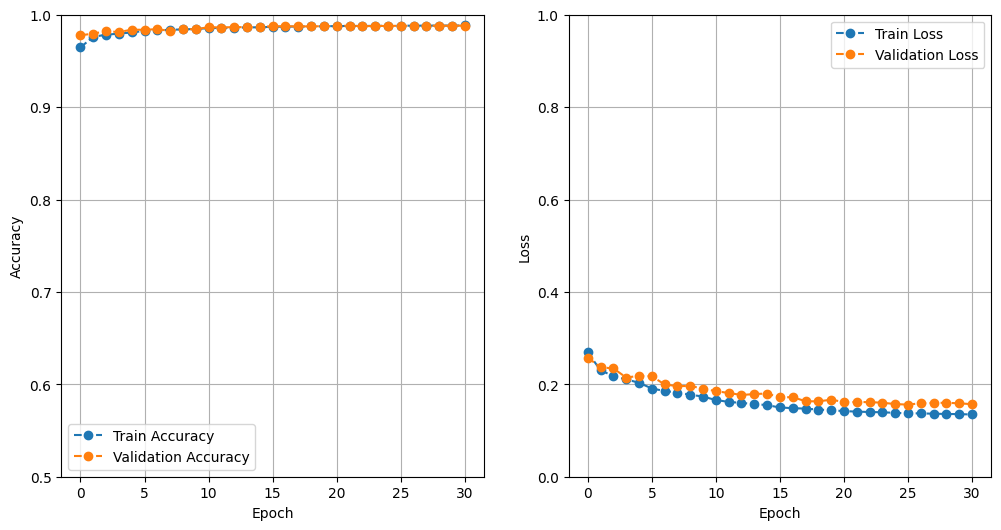

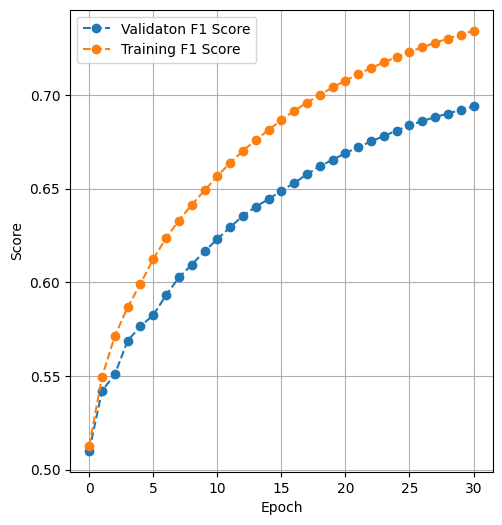

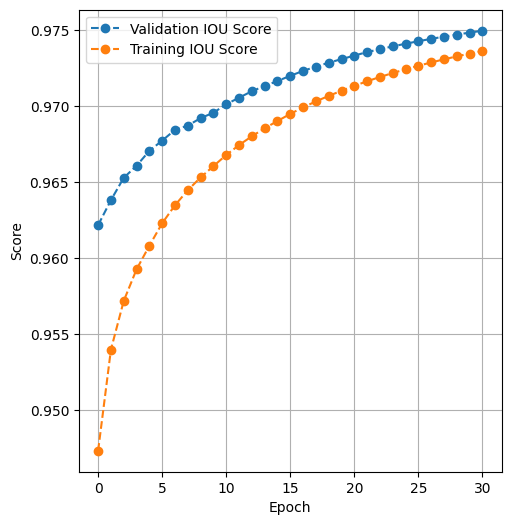

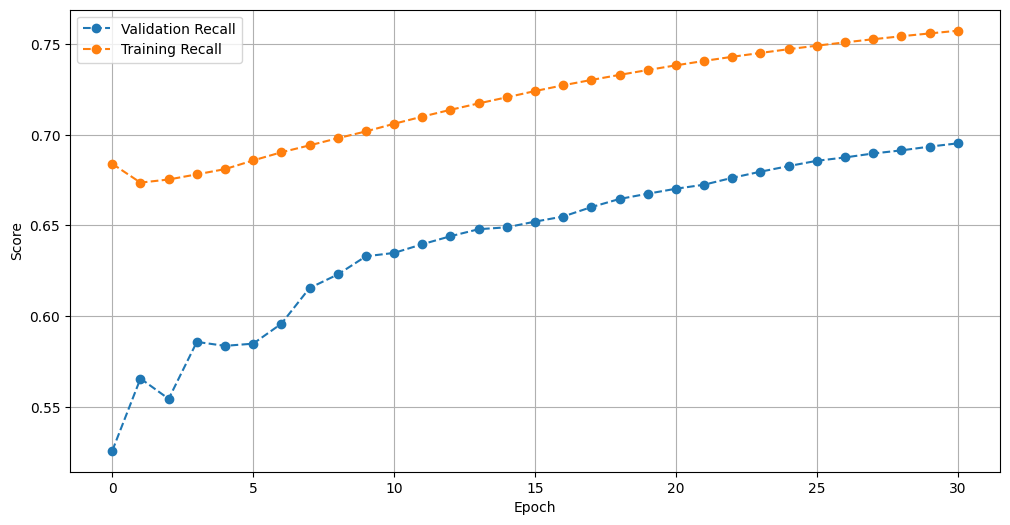

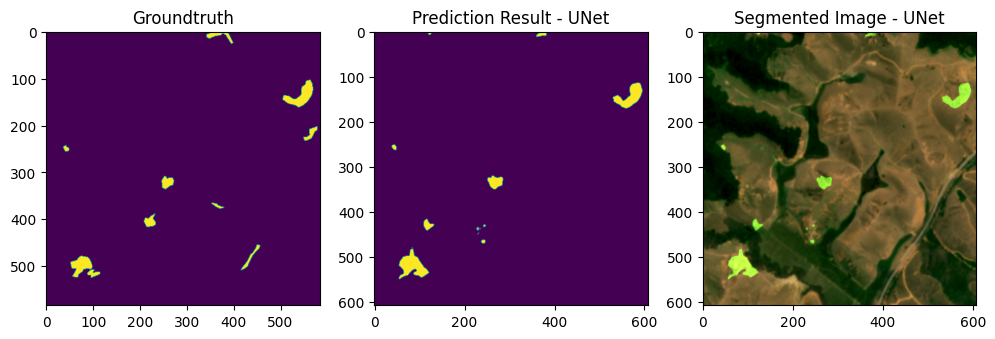

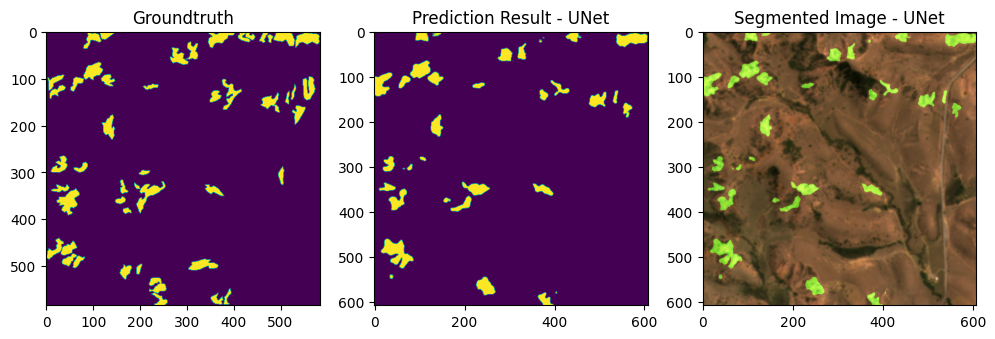

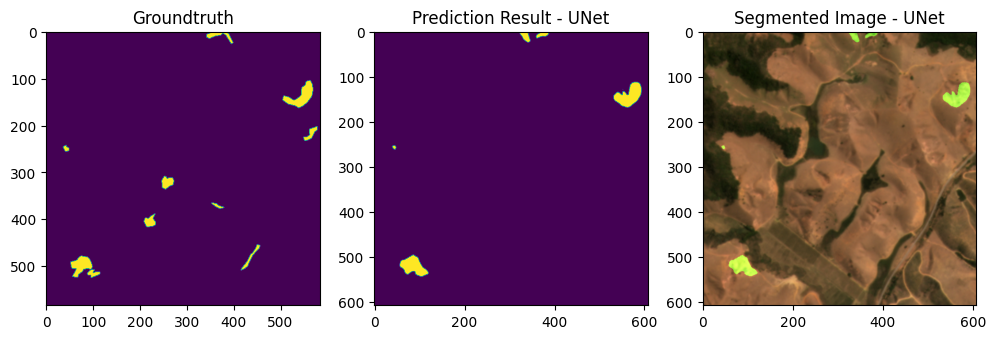

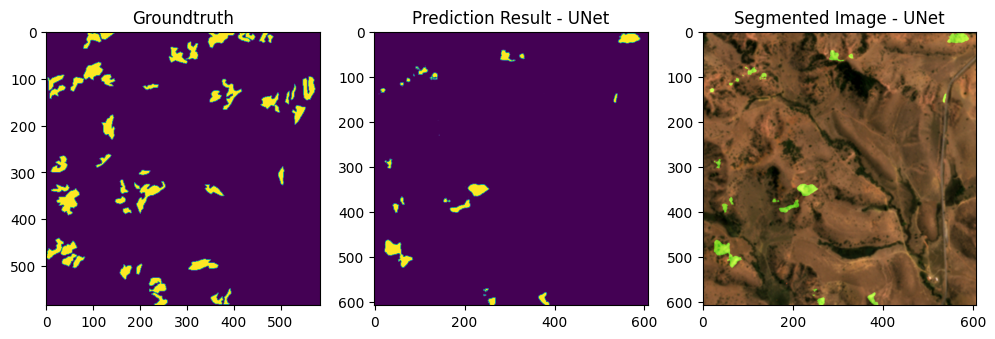

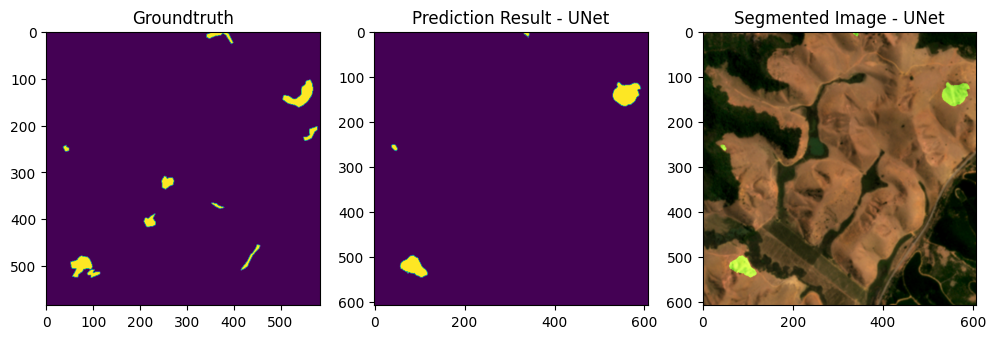

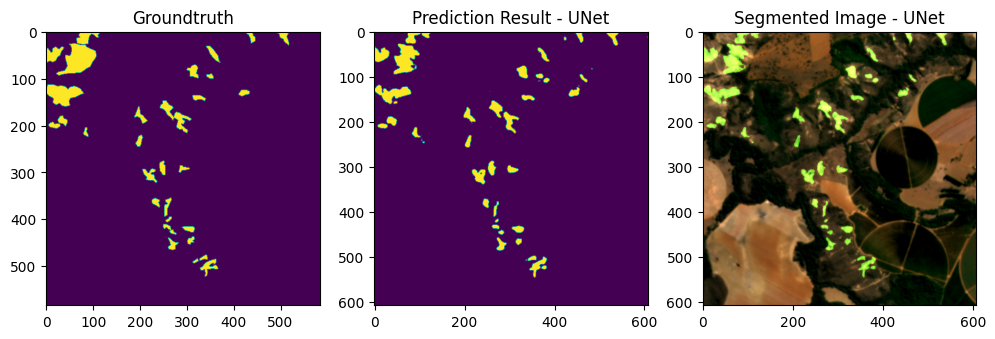

In [ ]:
# %%

if model_training:
    train(
        model,
        images_augmented,
        labels_augmented,
        images_validation,
        labels_validation,
        loss_func=BCEIoULoss(),
        batch_size=2,
        learning_rate=2e-4,
        epochs=100,
        model_validation=model_validation,
        cuda_available=cuda_available,
        path_model=path_model,
        patience=5,
    )

if model_loading:
    # Load the model from your Google Drive or local file system
    checkpoint = torch.load(path_model)
    model.load_state_dict(checkpoint["model_state_dict"])

for aux in range(747, 753):
    test(path_testing, aux, model, cuda_available)